Latencia média =  24.54721779843428


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

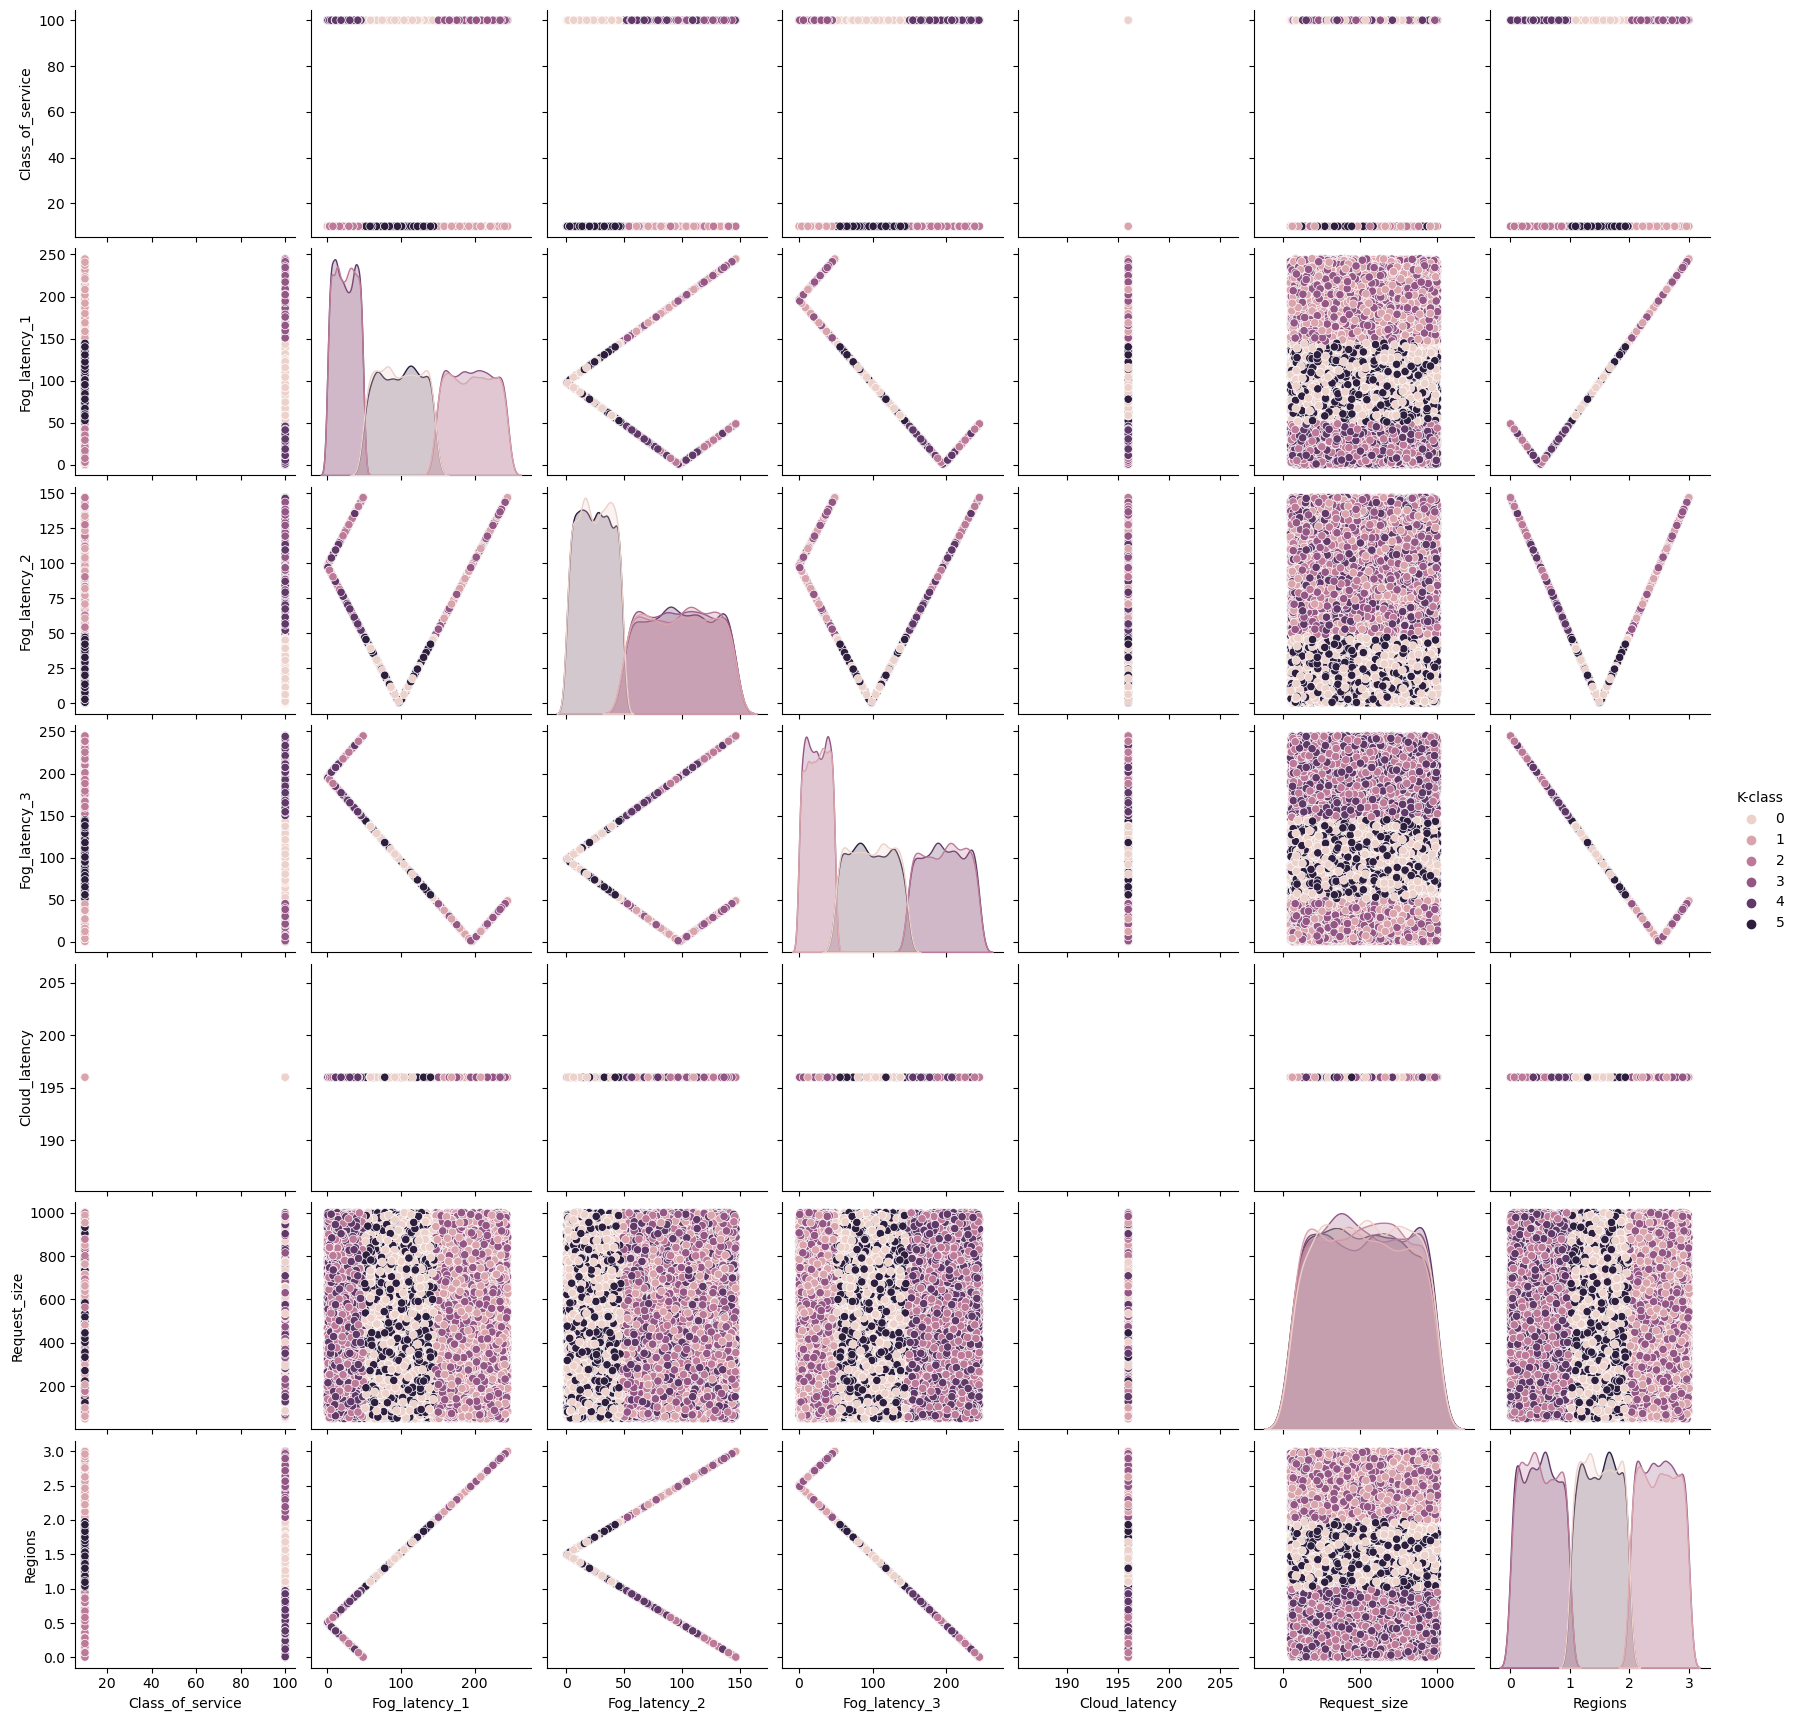

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))

#aplicação do kmeans
kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
quantidade dispositivos prioritarios =  6
quantidade dispositivos standard =  12
Menor latencia media =  9.925798563405753
latencia média por prioridade =  140.59246523007243
Horário =  1
quantidade dispositivos prioritarios =  16
quantidade dispositivos standard =  20
Menor latencia media =  8.219164876659658
latencia média por prioridade =  117.10805376554852
Horário =  2
quantidade dispositivos prioritarios =  28
quantidade dispositivos standard =  42
Menor latencia media =  9.548933081709041
latencia média por prioridade =  127.14893308170906
Horário =  3
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  63
Menor latencia media =  12.40712034781733
latencia média por prioridade =  109.63546680451029
Horário =  4
quantidade dispositivos prioritarios =  115
quantidade dispositivos standard =  101
Menor latencia media =  11.888630873119636
latencia média por

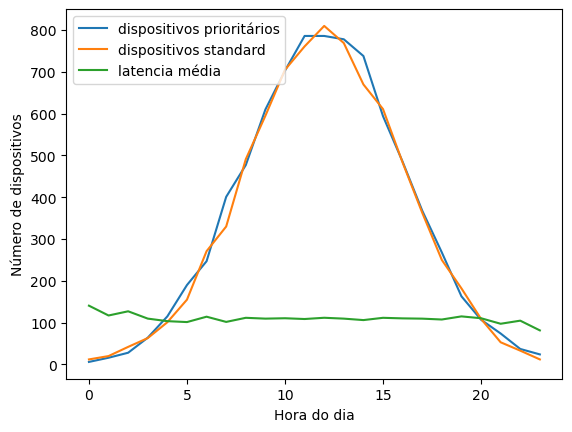

In [3]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    #aplicação do kmeans
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [4]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [5]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                # search for no_priority device connected to fog node
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_standard += 1

    return latency_by_priority, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [6]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_priority += 1
            else:
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"] + (len(processing_nodes[-1].queue_devices) * 100)
                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [7]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id] + (len(processing_nodes[region].queue_devices) * 100)

                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

### Clustering and getting ready for alocation processes

In [8]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    # clustering by hour
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[(0.2618843389144818, 3), (0.8561956225394924, 1), (1.464727612007937, 5), (1.8730654612030249, 2), (2.2723184790253708, 0), (2.505107169482498, 4)]
Horário =  1
[(0.2729648176394852, 5), (1.0107850673328747, 1), (1.6230193100304344, 3), (1.9106881582090312, 2), (2.5379879981450895, 0), (2.662421357454436, 4)]
Horário =  2
[(0.44223472651534257, 4), (0.7434172552931334, 1), (1.3376289285297465, 5), (1.6864283288496043, 2), (2.317194849485574, 3), (2.6771186877276074, 0)]
Horário =  3
[(0.5567691019397679, 3), (0.6360396573247074, 1), (1.3755243280434255, 4), (1.5865818609236084, 2), (2.4289375177840493, 0), (2.569387250404356, 5)]
Horário =  4
[(0.42903666172890986, 2), (0.5098594085339865, 3), (1.5355808436966791, 0), (1.6050622706531417, 4), (2.4757554870817904, 5), (2.602444019249825, 1)]
Horário =  5
[(0.46838023778013715, 2), (0.48885295846519816, 3), (1.5346727006758976, 0), (1.546

### Alocation by priority

Hour:  0
Alocation process time:  0.00010580000002846646
Latencia media:  140.85225100309924
Hour:  1
Alocation process time:  0.00037300000008144707
Latencia media:  117.10805376554855
Hour:  2
Alocation process time:  0.0006631000001107168
Latencia media:  127.17811866260537
Hour:  3
Alocation process time:  0.0006926999999450345
Latencia media:  109.96453979365498
Hour:  4
Alocation process time:  0.0016997000000174012
Latencia media:  103.53677902126782
Hour:  5
Alocation process time:  0.0028196000000662025
Latencia media:  101.35549377702384
Hour:  6
Alocation process time:  0.0041414999998323765
Latencia media:  114.21768956900212
Hour:  7
Alocation process time:  0.006034300000010262
Latencia media:  101.8312007155558
Hour:  8
Alocation process time:  0.007649700000001758
Latencia media:  111.57093727007693
Hour:  9
Alocation process time:  0.00842160000001968
Latencia media:  111.3416468623777
Hour:  10
Alocation process time:  0.009613499999886699
Latencia media:  123.0451154

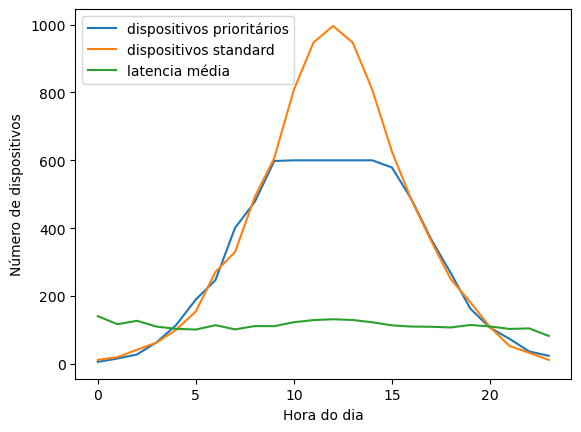

In [9]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    latency_by_priority, num_priority, num_standard = alocation_by_priority(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_by_priority(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

### Alocation - Fog First

Alocation process time:  6.259999986468756e-05
Latencia media:  24.71042908946799
Alocation process time:  0.00013090000015836267
Latencia media:  28.335715536932454
Alocation process time:  0.00021020000008320494
Latencia media:  26.462241473725598
Alocation process time:  0.00039629999992030207
Latencia media:  26.021322549000516
Alocation process time:  0.0006356999999752588
Latencia media:  23.784409478718707
Alocation process time:  0.006883200000174838
Latencia media:  23.539608148532604
Alocation process time:  0.07122690000005605
Latencia media:  24.123504837131076
Alocation process time:  0.2817026000000169
Latencia media:  55.09554606352619
Alocation process time:  0.4307430999999724
Latencia media:  89.32203652394517
Alocation process time:  0.5679126999998516
Latencia media:  110.91863910755421
Alocation process time:  0.656740599999921
Latencia media:  123.30111430525432
Alocation process time:  0.7267733000001044
Latencia media:  129.30676967144902
Alocation process time:

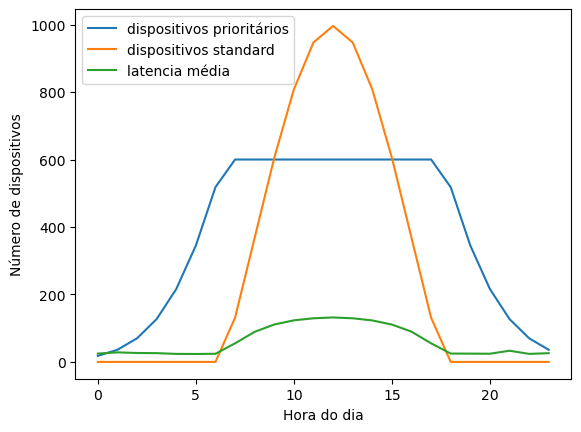

In [10]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    latency_by_priority, num_priority, num_standard = fog_first_alocation(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='fog_first_alocation(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

### Alocation - Only Cloud

Alocation process time:  5.459999988488562e-05
Latencia media:  196.0
Alocation process time:  0.0001059999999597494
Latencia media:  196.0
Alocation process time:  0.00019339999994372192
Latencia media:  196.0
Alocation process time:  0.000335700000050565
Latencia media:  196.0
Alocation process time:  0.0005662999999458407
Latencia media:  196.0
Alocation process time:  0.0008975000000646105
Latencia media:  196.0
Alocation process time:  0.002560399999993024
Latencia media:  196.0
Alocation process time:  0.31175600000005943
Latencia media:  196.0
Alocation process time:  1.0059555999998793
Latencia media:  196.0
Alocation process time:  2.374165200000107
Latencia media:  1948.2821576763486
Alocation process time:  3.7176590999999917
Latencia media:  6121.852272727273
Alocation process time:  5.136035799999945
Latencia media:  9884.299935358758
Alocation process time:  4.980473699999948
Latencia media:  11342.992481203008
Alocation process time:  4.8589503000000605
Latencia media:  

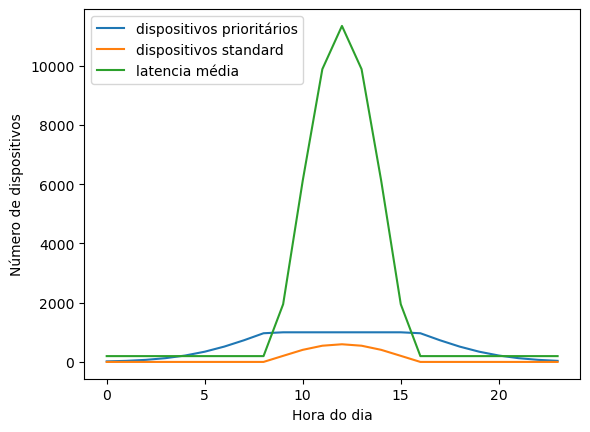

In [11]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    latency_by_priority, num_priority, num_standard = alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

### Alocation - Only Fog

Alocation process time:  7.430000005115289e-05
Latencia media:  24.71042908946799
Alocation process time:  0.00014420000002246525
Latencia media:  28.335715536932454
Alocation process time:  0.00028100000008635106
Latencia media:  26.462241473725598
Alocation process time:  0.0003750999999283522
Latencia media:  26.021322549000516
Alocation process time:  0.00065960000006271
Latencia media:  23.784409478718707
Alocation process time:  0.006791600000042308
Latencia media:  23.539608148532604
Alocation process time:  0.07091790000004039
Latencia media:  24.123504837131076
Alocation process time:  0.3265566000000035
Latencia media:  433.2523601275973
Alocation process time:  0.6262775999998667
Latencia media:  2381.721942204614
Alocation process time:  1.1786709000000428
Latencia media:  5126.165181527139
Alocation process time:  1.7141968999999335
Latencia media:  7838.796017583424
Alocation process time:  2.1601298999999017
Latencia media:  9808.261067432959
Alocation process time:  2.2

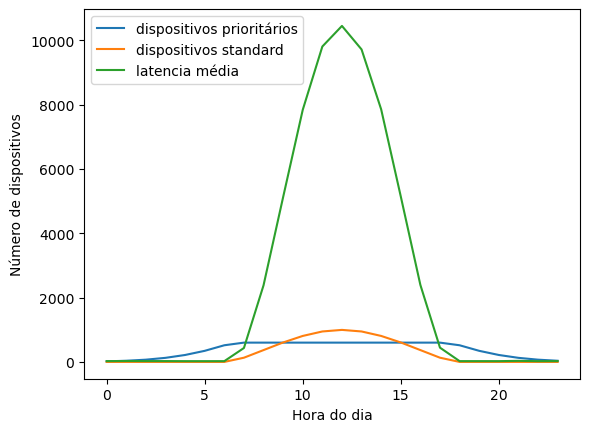

In [12]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ########################
    # ALOCATION - ONLY FOG #
    ########################
    latency_by_priority, num_priority, num_standard = alocation_fog_only(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_fog_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)


    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()